In [1]:
import os
import random
import pickle
import glob
from PIL import Image, ImageDraw

In [2]:
categories = [
    "veh_go",
    "veh_goLeft",
    "veh_noSign",
    "veh_stop",
    "veh_stopLeft",
    "veh_stopWarning",
    "veh_warning",
    "ped_go",
    "ped_noSign",
    "ped_stop",
    "bus_go",
    "bus_noSign",
    "bus_stop",
    "bus_warning",
]
id2label = {index: x for index, x in enumerate(categories, start=0)}
label2id = {v: k for k, v in id2label.items()}

In [3]:
test_anno_path = '/workspace/traffic_light/ultra/Result/detect/a100'
test_image_path = '/workspace/traffic_light/data/detection/test/images'

output_path = '/workspace/traffic_light/ultra/Result/detect/cut_result'
os.makedirs(output_path, exist_ok=True)

In [37]:
threshold_ratio = 0.75 

test_annos = sorted(glob.glob(f'{test_anno_path}/*.txt'))
# file_name = '10005880'
# test_annos = [f'/workspace/traffic_light/ultra/Result/detect/a100/{file_name}.txt']

delete_files=[]
empty_files=[]
for test_anno in test_annos:
    file_name = os.path.splitext(os.path.basename(test_anno))[0]
    img = os.path.join(test_image_path, f"{file_name}.jpg")
    img = Image.open(img)
    original_w, original_h = img.size
    threshold = original_h * threshold_ratio
       
    line_list = []
    with open(test_anno, "r") as file:
        if os.stat(test_anno).st_size == 0:
            empty_files.append(file_name)
            continue
        for line in file:
            class_id, norm_center_x, norm_center_y, norm_w, norm_h, cs= map(
                float, line.strip().split()
            )
            # print( norm_center_x, norm_center_y, norm_w, norm_h, cs)
            y_min = (norm_center_y - norm_h / 2) * original_h

            if y_min > threshold:
                delete_files.append(f"{file_name}.txt")
                continue
            else: 
                line_list.append("%d %lf %lf %lf %lf %lf\n"%(class_id, norm_center_x, norm_center_y, norm_w, norm_h, cs))
    # save result txt files
    with open(os.path.join(output_path, f"{file_name}.txt"), 'w') as f:
        for line_str in line_list:
            f.write(line_str)
    
print("done")
print("delted files len: ", len(delete_files))
print("delted files list: ", delete_files)
print("the empty files len: ", len(empty_files))
print("the empty files list: ", empty_files)

done
delted files len:  1768
delted files list:  ['10000035.txt', '10000036.txt', '10000055.txt', '10000056.txt', '10000057.txt', '10000058.txt', '10000059.txt', '10000059.txt', '10000060.txt', '10000060.txt', '10000100.txt', '10000100.txt', '10000101.txt', '10000120.txt', '10000121.txt', '10000122.txt', '10000130.txt', '10000131.txt', '10000131.txt', '10000131.txt', '10000159.txt', '10000160.txt', '10000162.txt', '10000163.txt', '10000164.txt', '10000165.txt', '10000167.txt', '10000168.txt', '10000169.txt', '10000362.txt', '10001438.txt', '10001486.txt', '10001486.txt', '10001620.txt', '10001620.txt', '10001623.txt', '10001655.txt', '10002482.txt', '10002484.txt', '10002485.txt', '10002487.txt', '10002492.txt', '10002574.txt', '10002575.txt', '10002575.txt', '10002576.txt', '10002577.txt', '10002578.txt', '10002579.txt', '10002579.txt', '10002580.txt', '10002580.txt', '10002581.txt', '10002582.txt', '10002583.txt', '10002619.txt', '10002619.txt', '10002620.txt', '10002882.txt', '10003

In [27]:
len(empty_files)

1768

# visualization
- ref : https://huggingface.co/docs/transformers/tasks/object_detection

10005928.jpg


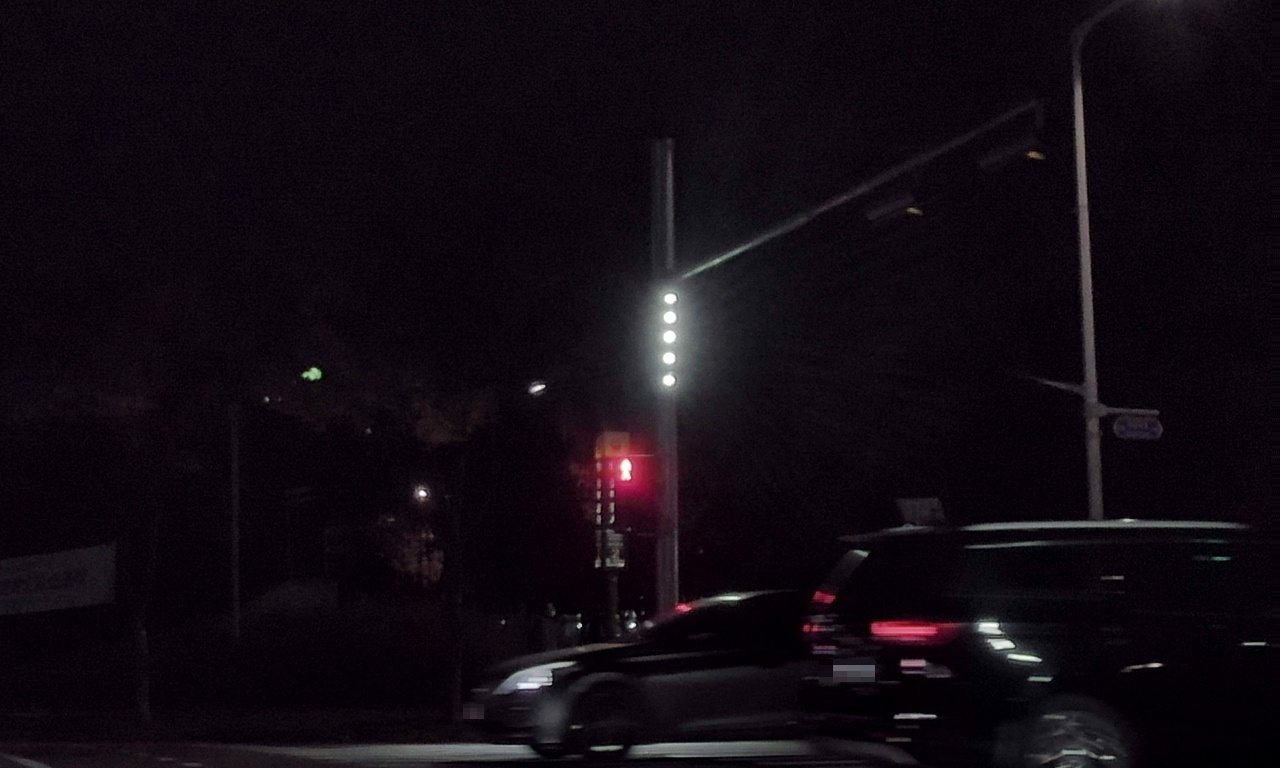

In [39]:
txt_list = sorted(glob.glob(f'{test_anno_path}/*.txt'))
# random_num = random.randrange(10000000, 10000000 + 8714)#len(txt_list))

random_num = '10005928' # 10003716.jpg
sample_img = os.path.join(test_image_path, f"{random_num}.jpg")
print(os.path.basename(sample_img))

img = Image.open(sample_img)
original_w, original_h = img.size
# print(original_w, original_h)
draw = ImageDraw.Draw(img)




threshold = original_h * 0.75
empty_files = []
test_annos = [f'/workspace/traffic_light/ultra/Result/detect/a100/{random_num}.txt']
for test_anno in test_annos:
    with open(test_anno, "r") as file:
        if file == 0:
            empty_files.append(f'{random_num}.txt')
            continue

        for line in file:
            class_id, norm_center_x, norm_center_y, norm_w, norm_h, cs= map(
                float, line.strip().split()
            )
            # print( norm_center_x, norm_center_y, norm_w, norm_h, cs)
            x_min = (norm_center_x - norm_w / 2) * original_w
            y_min = (norm_center_y - norm_h / 2) * original_h
            x_max = (norm_center_x - norm_w / 2) * original_w + norm_w * original_w
            y_max = (norm_center_y - norm_h / 2) * original_h + norm_h * original_h

            # if score < 0.5:  # ! score 조정하기!
            #     continue
            if y_min < threshold:
                print( norm_center_x, norm_center_y, norm_w, norm_h, cs)
            elif y_min > threshold:
                print("없어진거:", norm_center_x, norm_center_y, norm_w, norm_h, cs)
                # continue
            x1 = 0
            y1 = original_h*0.75
            x2 = original_w
            y2 = original_h
            draw.rectangle((x1,y1,x2,y2), outline='blue', width = 2)
            draw.rectangle((x_min, y_min, x_max, y_max), outline="red", width=1)
            draw.text((x_min, y_min), id2label[class_id], fill="white")

img